# 第17章 使用其他集合类
Scala拥有功能丰富的集合类库。本章带你参观最常用的集合类型和操作，介绍那些最常使用的部分。第24章将会给出更全面的讲解，第25章还会介绍Scala如何利用其组合语法结构来提供这样丰富的API。

## 17.1 序列
序列类型可以用来处理依次排列分组的数据。由于元素是有次序的，可以向序列获取第1个元素、第2个元素、第103个元素，等等。本节我们将带你了解那些最重要的序列类型。

### 列表

也许我们需要知道的最重要的序列类型是List类，也就是我们在前一章介绍的不可变链表。列表支持在头部快速添加和移除条目，不过并不提供快速的按下标访问的功能，因为实现这个功能需要线性地遍历列表。

这样的特性组合听上去可能有些怪，但其实对于很多算法而言都非常适合。快速的头部添加和移除意味着模式匹配很顺畅（参考第15章）。而列表的不可变性质帮助我们开发正确、高效的算法，因为我们不需要（为了防止意外）复制列表。

以下是一个简短的例子，展示如何初始化列表，并访问其头部和尾部：

In [1]:
val colors = List("red", "bule", "green")

colors: List[String] = List("red", "bule", "green")

In [2]:
colors.head

res1: String = "red"

In [3]:
colors.tail

res2: List[String] = List("bule", "green")

如果想从头复习列表的基础，参考第3章的第8步，第16章有关于使用列表的细节。我们在第22章还会讨论到列表，关于在Scala中列表的实现。

### 数组

数组允许我们保存一个序列的元素，并使用从零开始的下标高效地访问（获取或更新）指定位置的元素值。以下是如何创建一个我们已知大小但还不知道元素值的数组：

In [4]:
val fiveInts = new Array[Int](5)

fiveInts: Array[Int] = Array(0, 0, 0, 0, 0)

以下是如何初始化一个我们已知元素值的数组：

In [5]:
val fiveToOne = Array(5, 4, 3, 2, 1)

fiveToOne: Array[Int] = Array(5, 4, 3, 2, 1)

我们前面提到过，在Scala中以下标访问数组的方式是把下标放在圆括号里，而不是像Java那样放在方括号里。下面的例子同时展示了获取数组元素和更新数组元素的写法：

In [6]:
fiveInts(0) = fiveToOne(4)

In [7]:
fiveInts

res6: Array[Int] = Array(1, 0, 0, 0, 0)

Scala数组的表现形式跟Java数组一致。因此，我们可以无缝地使用那些返回数组的Java方法。[1]

前面的章节当中我们已经多次看到数组在实际使用中的样子。基本的用法可以参考第3章的第7步；在7.3节还展示了若干使用for表达式遍历数组的例子；在第10章的二维布局类库中，数组也发挥了重要作用。

### 列表缓冲（list buffer）

List类提供对列表头部的快速访问，对尾部访问则没那么高效。因此，当我们需要往列表尾部追加元素来构建列表时，通常要考虑反过来往头部追加元素，追加完成以后，再调用reverse来获得我们想要的顺序。

另一种避免reverse操作的可选方案是使用ListBuffer。ListBuffer是一个可变对象（包含在 scala.collection.mutable包中），帮助我们在需要追加元素来构建列表时可以更高效。ListBuffer提供了常量时间的往后追 加和往前追加的操作。我们可以用+=操作符来往后追加元素，用+=：来往前追加元素。完成构建以后，我们可以调用ListBuffer的toList来获 取最终的List。参考下面的例子：

In [8]:
import scala.collection.mutable.ListBuffer

import scala.collection.mutable.ListBuffer

In [9]:
val buf = new ListBuffer[Int]

buf: ListBuffer[Int] = ListBuffer()

In [10]:
buf += 1

res9: ListBuffer[Int] = ListBuffer(1)

In [11]:
buf += 2

res10: ListBuffer[Int] = ListBuffer(1, 2)

In [12]:
3 +=: buf

res11: ListBuffer[Int] = ListBuffer(3, 1, 2)

In [13]:
buf.toList

res12: List[Int] = List(3, 1, 2)

使用ListBuffer而不是List的另一个原因是防止可能出现的栈溢出。如果我们可以通过往前追加来构建出预期顺序的列表，但需要的递归算法并不是尾 递归的，可以用for表达式或者while循环加上ListBuffer来实现。我们将在22.2节介绍ListBuffer的这种用法。

### 数组缓冲

ArrayBuffer跟数组很像，除了可以额外地从序列头部或尾部添加或移除元素。所有的Array操作在ArrayBuffer都可用，不过由于实现的包装，会稍慢一些。新的添加和移除操作平均而言是常量时间的，不过偶尔会需要线性的时间，这是因为其实现需要不时地分配新的数组来保存缓冲的内容。

要使用ArrayBuffer，必须首先从可变集合的包引入它：

In [14]:
import scala.collection.mutable.ArrayBuffer

import scala.collection.mutable.ArrayBuffer

在创建ArrayBuffer时，必须给出类型参数，不过并不需要指定长度。ArrayBuffer会在需要时自动调整分配的空间：

In [15]:
val buf = new ArrayBuffer[Int]()

buf: ArrayBuffer[Int] = ArrayBuffer()

可以用+=方法来向ArrayBuffer追加元素：

In [16]:
buf += 12

res15: ArrayBuffer[Int] = ArrayBuffer(12)

In [17]:
buf += 15

res16: ArrayBuffer[Int] = ArrayBuffer(12, 15)

In [18]:
buf.length

res17: Int = 2

In [19]:
buf(0)

res18: Int = 12

### 字符串（通过StringOps）
我们需要了解的另一个序列是StringOps，它实现了很多序列方法。由于Predef有一个从String到StringOps的隐式转换，可以将任何字符串当作序列来处理。参考下面的例子：

In [20]:
def hasUpperCase(s: String) = s.exists(_.isUpper)

defined function hasUpperCase

In [21]:
hasUpperCase("Robert Frost")

res20: Boolean = true

In [22]:
hasUpperCase("e e cummings")

res21: Boolean = false

在本例中，hasUpperCase方法体里，我们对名为s的字符串调用了exists方法。由于String类本身并没有声明任何名为“exists”的 方法， Scala编译器会隐式地将s转换成StringOps,StringOps有这样一个方法。exists方法将字符串当作字符的序列，当序列中存在大写字符时，这个方法将返回true。[2]

## 17.2 集和映射
我们在前面的章节（从第3章的第10步开始）已经了解了集和映射的基础，本节将提供更多关于集和映射用法的内容，并给出更多的示例。

像前面提到的，Scala集合类库同时提供了可变和不可变两个版本的集和映射。图3.2（44页）给出了集的类继承关系，图3.3（46页）给出了映射的类继承关系。如这些图所示，Set和Map这样的名字各作为特质出现了三次，分别在不同的包中。
当我们写下“Set”或“Map”时，默认得到的是一个不可变的对象。如果我们想要的是可变的版本，需要显式地做一次引入。Scala让我们更容易访问到不可变的版本，这是鼓励我们尽量使用不可变的集合。这样的访问便利是通过Predef对象完成的，这个对象的内容在每个Scala源文件中都会隐式地引入。 示例17.1给出了相关的定义：  
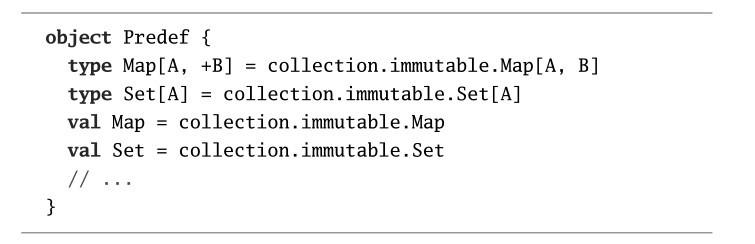  
<center>示例17.1 Predef中的默认映射和集定义</center>

Predef利用“type”关键字定义了Set和Map这两个别名，分别对应不可变的集和不可变的映射的完整名称。[3]名为Set和Map的val被初始化成指向不可变Set和Map的单例对象。因此Map等同于Predef.Map，而Predef. Map又等同于scala.collection.immutable.Map。这一点对于Map类型和Map对象都成立。

如果我们想在同一个源文件中同时使用可变的和不可变的集或映射，一种方式是引入包含可变版本的包：

In [23]:
import scala.collection.mutable

import scala.collection.mutable

可以继续用Set来表示不可变集，就跟以前一样，不过现在可以用multable.Set来表示可变的集。  
参考下面例子：

In [24]:
val mutaSet = mutable.Set(1, 2, 3)

mutaSet: mutable.Set[Int] = Set(1, 2, 3)

### 使用集
集的关键特征是它们会确保同一时刻，以==为标准，集里的每个对象都最多出现一次。作为示例，我们将用一个集来统计某个字符串中不同单词的个数。

如果我们将空格和标点符号作为分隔符给出，String的split方法可以帮助我们将字符串切分成单词。“[ !,.]+”这样的正则表达式就够了：它表示给定的字符串需要在有一个或多个空格或标点符号的地方切开。

In [25]:
val text = "See Spot run. Run, Spot. Run!"

text: String = "See Spot run. Run, Spot. Run!"

In [26]:
val wordsArrsy = text.split("[ !,.]")

wordsArrsy: Array[String] = Array(
  "See",
  "Spot",
  "run",
  "",
  "Run",
  "",
  "Spot",
  "",
  "Run"
)

In [27]:
val wordsArray = text.split("[ !,.]+")

wordsArray: Array[String] = Array("See", "Spot", "run", "Run", "Spot", "Run")

要统计不同单词的个数，可以将它们统一转换成大写或小写，然后将它们添加到一个集当中。由于集自动排除重复项，每个不同的单词都会在集里出现不多不少的一次。

首先，可以用Set伴生对象的empty方法创建一个空集：

In [28]:
val words = mutable.Set.empty[String]

words: mutable.Set[String] = Set()

In [29]:
for(word <- wordsArray)
    words += word.toLowerCase

In [30]:
words

res29: mutable.Set[String] = Set("see", "run", "spot")

这样我们就得出结论：给定文本包含三个不同的单词：spot、run和see。可变集和不可变集最常用的方法如表17.1所示。  
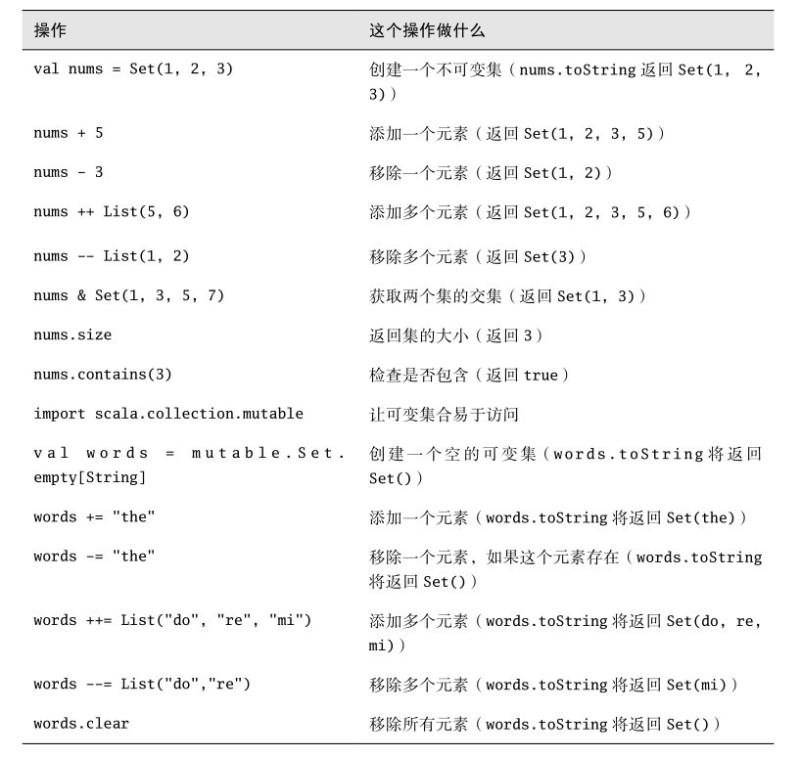

### 使用映射
映射让我们可以对某个集的每个元素都关联一个值。使用映射看上去跟使用数组很像，只不过我们不再是用从0开始的整数下标去索引，而是可以用任何键来索引它。如果我们引入了mutable这个包名，就可以像这样创建一个空的可变映射：

In [31]:
val map = mutable.Map.empty[String, Int]

map: mutable.Map[String, Int] = Map()

In [32]:
map("hello") = 1

In [33]:
map("there") = 2

In [34]:
map

res33: mutable.Map[String, Int] = Map("hello" -> 1, "there" -> 2)

同理，从映射读取值也跟从数组读取值类似：

In [35]:
map("hello")

res34: Int = 1

所有这些加在一起，下面是一个统计每个单词在字符串中出现次数的方法：

In [36]:
def countWords(text: String) = {
    val counts = mutable.Map.empty[String, Int]
    for(rawWord <- text.split("[ !,.]+")) {
        val word = rawWord.toLowerCase      
        val oldCount = 
            if(counts.contains(word)) counts(word)
            else 0
        counts += (word -> (oldCount + 1))
    }
    counts
}

defined function countWords

In [37]:
countWords("See Spot run! Run, Spot. Run!")

res36: mutable.Map[String, Int] = Map("spot" -> 2, "see" -> 1, "run" -> 3)

有了这些次数统计，我们可以看到给定的文本更多地谈到跑步（run），而较少讨论看见（see）。

这段代码的主要逻辑是：一个名为counts的可变映射将每个单词映射到它在文本中出现的次数，对于给定文本的每一个单词，这个单词对应的原次数被查出，然后加1，新的次数又再次被存回counts。注意这里我们用contains来检查某个单词是否已经出现过。如果counts.contains（word）不为true，那么这个单词就还没有出现过，我们在后续计算中采用的次数就是0。

可变映射和不可变映射最常用的方法如表17.2所示。  
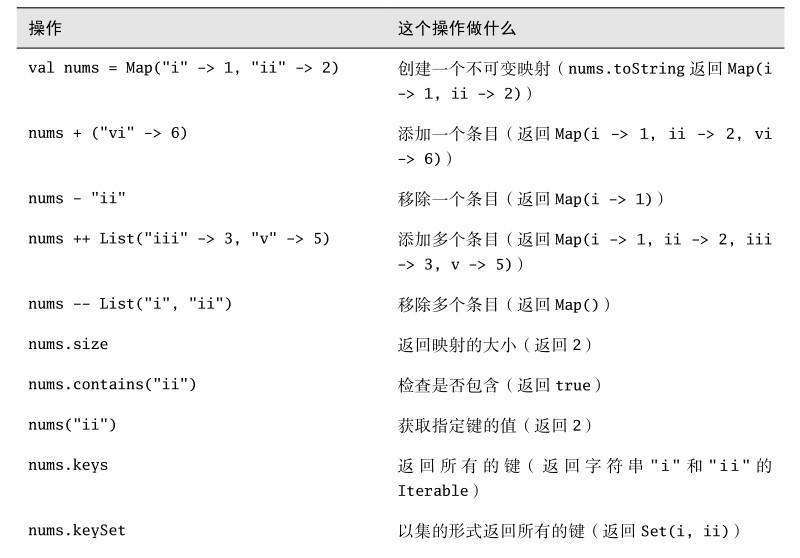  
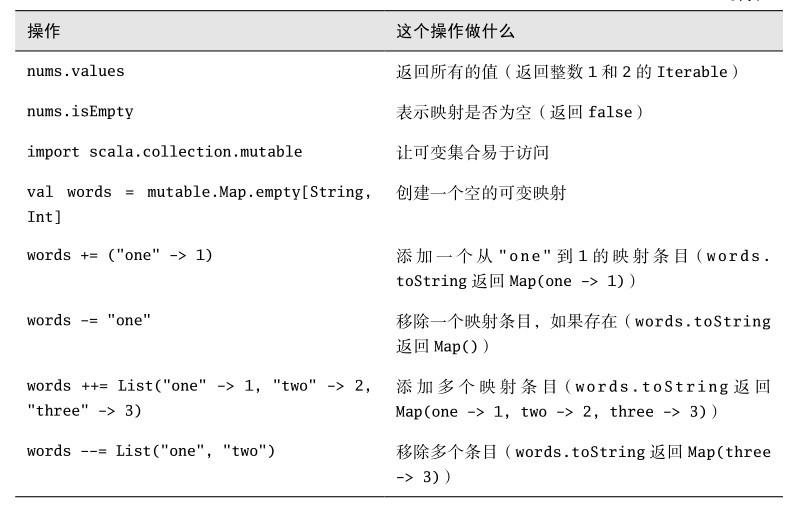

### 默认的集和映射
对于大部分使用场景，由Set（）、scala.collection.mutable.Map（）等工厂方法提供的可变和不可变的集和映射的实现通常都够用了。这些工厂方法提供的实现使用快速的查找算法，通常用到哈希表，因此可以很快判断出某个对象是否在集合中。

举例来说，scala.collection.mutable.Set（）这个工厂方法返回一个 scala.collection.mutable.HashSet，在内部使用了哈希表。同理，scala. collection.mutable.Map（）这个工厂方法返回的是一个scala.collection. mutbale.HashMap。

对于不可变集和映射而言，情况要稍微复杂一些。举例来说，scala. collection.immutable.Set（）工厂方法返回的类取决于我们传入了多少元素，如表17.3所示。对于少于五个元素的集，有专门的特 定大小的类与之对应，以此来达到最好的性能。一旦我们要求一个大于等于五个元素的集，这个工厂方法将返回一个使用哈希字典树（hash tree）的实现。  
<center>表17.3 默认的不可变集实现</center>

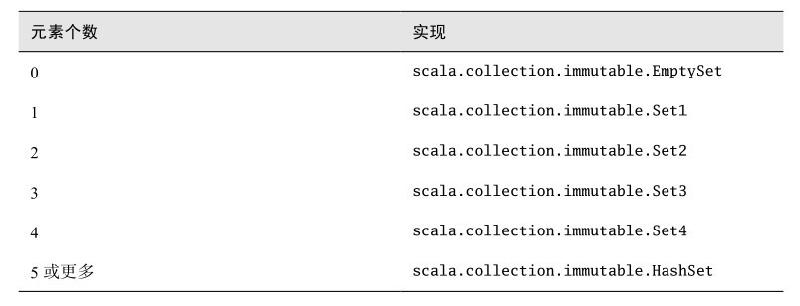

同理，scala.collection.immutable.Map（）这个工厂方法会根据我们传给它多少键值对来决定返回什么类的实现，如表17.4所示。跟集类似，对于少于五个元素的不可变映射，都会有一个特定的固定大小的映射与之对应，以此来达到最佳性能。而一旦映射中的键值对个数达到或超过五个，则会使用不可变的HashMap。

<center>表17.4 默认的不可变映射实现</center>

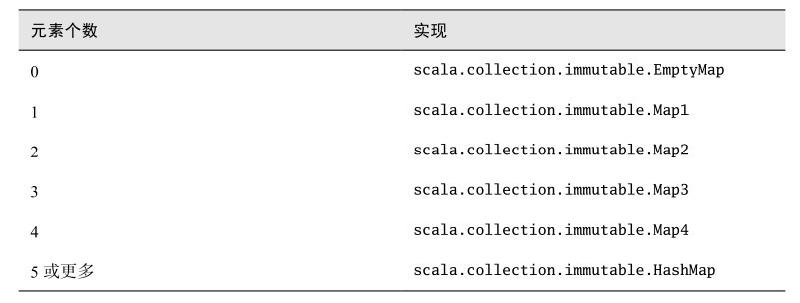

表17.3和17.4给出的默认不可变实现类能够带给我们最佳的性能。举例来说，如果添加一个元素到EmptySet，我们将得到一个Set1。如果添加一个元素到Set1，会得到一个Set2。如果这时再从Set2移除一个元素，我们又会得到另一个Set1。

### 排好序的集和映射

有时我们可能需要一个迭代器按照特定顺序返回元素的集或映射。对此， Scala集合类库提供了SortedSet和SortedMap特质。这些特质被TreeSet和TreeMap类实现，这些实现用红黑树来保持元素 （对TreeSet而言）或键（对TreeMap而言）的顺序。具体顺序由Ordered特质决定，集的元素类型或映射的键的类型都必须混入或能够被隐式 转换成Ordered。这两个类只有不可变的版本。以下是TreeSet的例子：

In [38]:
import scala.collection.immutable.TreeSet

import scala.collection.immutable.TreeSet

In [39]:
val ts = TreeSet(9, 3, 1, 8, 0, 2, 7, 4, 6, 5)

ts: TreeSet[Int] = TreeSet(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [40]:
val cs = TreeSet('f', 'u', 'n')

cs: TreeSet[Char] = TreeSet('f', 'n', 'u')

以下是TreeMap的例子：

In [41]:
import scala.collection.immutable.TreeMap

import scala.collection.immutable.TreeMap

In [42]:
val tm = TreeMap(3 -> 'x', 1 -> 'x', 4 -> 'x')

tm: TreeMap[Int, Char] = Map(1 -> 'x', 3 -> 'x', 4 -> 'x')

In [43]:
tm + (2 -> 'x') 

res42: TreeMap[Int, Char] = Map(1 -> 'x', 2 -> 'x', 3 -> 'x', 4 -> 'x')